In [5]:
conda install mdanalysis

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/tanyagoyal/opt/anaconda3

  added / updated specs:
    - mdanalysis


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.79             |   py38h96a0964_1         2.6 MB  conda-forge
    conda-4.11.0               |   py38h50d1736_0        16.9 MB  conda-forge
    griddataformats-0.6.0      |     pyhd8ed1ab_0         2.0 MB  conda-forge
    gsd-2.5.1                  |   py38hbe852b5_0         120 KB  conda-forge
    mdanalysis-1.0.0

In [2]:
pip install nglview

     |████████████████████████████████| 5.7 MB 2.0 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for nglview: filename=nglview-3.0.3-py3-none-any.whl size=8057551 sha256=c6038c3772029988f1fe2756389589a920c850bb0adff4a85f99dab05fe883e5
  Stored in directory: /Users/tanyagoyal/Library/Caches/pip/wheels/83/a4/c3/283e7ba3ea501b8fb6fb4acc8f11d6aada1f1640d794db0c41
Successfully built nglview
Note: you may need to restart the kernel to use updated packages.


In [6]:
conda update mdanalysis

Solving environment: done

## Package Plan ##

  environment location: /Users/tanyagoyal/opt/anaconda3

  added / updated specs:
    - mdanalysis


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    applaunchservices-0.2.1    |             py_0           8 KB  conda-forge
    arviz-0.11.4               |     pyhd8ed1ab_0         1.4 MB  conda-forge
    backports.functools_lru_cache-1.6.4|     pyhd8ed1ab_0           9 KB  conda-forge
    backports.tempfile-1.0     |             py_0          10 KB  conda-forge
    backports.weakref-1.0.post1|py38h32f6830_1002           8 KB  conda-forge
    cftime-1.5.1.1             |   py38hbe852b5_1         189 KB  conda-forge
    cloudpickle-1.6.0          |             py_0          22 KB  conda-forge
    conda-content-trust-0.1.3  |     pyhd8ed1ab_0          54 KB  conda-forge
    conda-package-handling-1.7.3|   py38h96a0964_1         1.7 MB  conda-for

In [7]:
conda install MDAnalysisTests

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/tanyagoyal/opt/anaconda3

  added / updated specs:
    - mdanalysistests


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    hypothesis-6.35.0          |     pyhd8ed1ab_0         253 KB  conda-forge
    mdanalysistests-1.0.0      |   py38h32f6830_1        44.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        44.2 MB

The following NEW packages will be INSTALLED:

  hypothesis         conda-forge/noarch::hypothesis-6.35.0-pyhd8ed1ab_0
  mdanalysistests    conda-forge/osx-64::mdanalysistests-1.0.0-py38h32f6830_1



hypothesis-6.35.0    | 

In [2]:
pip install matplotlib==3.2  

     |████████████████████████████████| 12.4 MB 7.6 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.4
    Uninstalling matplotlib-3.3.4:
      Successfully uninstalled matplotlib-3.3.4
Note: you may need to restart the kernel to use updated packages.


# Calculating the RDF atom-to-atom

We calculate the site-specific radial distribution functions of solvent around certain atoms.

Packages required:

MDAnalysis ([MADWB11], [GLB+16])
and MDAnalysisTests

Optional packages for visualisation:
matplotlib

In [1]:
import MDAnalysis as mda
from MDAnalysis.tests.datafiles import TPR, XTC
from MDAnalysis.analysis import rdf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/Users/tanyagoyal/opt/anaconda3/lib/python3.8/site-packages/MDAnalysisTests/__init__.py:126: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


## Loading files

The test files here is adenylate kinase (AdK), a phosophotransferase enzyme. ([BDPW09])

In [2]:
u = mda.Universe(TPR, XTC)

## Calculating the site-specific radial distribution function

A radial distribution function g_ab(r) describes the time-averaged density of particles in b from the reference group a at distance r. It is normalised so that it becomes 1 for large separations in a homogenous system
The InterRDF_s class (API docs) allows you to compute RDFs on an atom-to-atom basis, rather than simply giving the averaged RDF as in InterRDF.

Below, we have calculated the RDF between selected alpha-carbons and the water atoms within 15 angstroms of CA60, in the first frame of the trajectory. The water group does not update over the trajectory as the water moves towards and away from the alpha-carbon.

The RDF is limited to a spherical shell around each atom by range. Note that the range is defined around each atom, rather than the center-of-mass of the entire group.

If density=True, the final RDF is over the average density of the selected atoms in the trajectory box, making it comparable to the output of rdf.InterRDF. If density=False, the density is not taken into account. This can make it difficult to compare RDFs between AtomGroups that contain different numbers of atoms.

In [3]:
ca60 = u.select_atoms('resid 60 and name CA')
ca61 = u.select_atoms('resid 61 and name CA')
ca62 = u.select_atoms('resid 62 and name CA')
water = u.select_atoms('resname SOL and sphzone 15 group sel_a', sel_a=ca60)

ags = [[ca60+ca61, water], [ca62, water]]

ss_rdf = rdf.InterRDF_s(u, ags,
                    nbins=75,  # default
                    range=(0.0, 15.0),  # distance
                    density=True,
                   )
ss_rdf.run();

Like rdf.InterRDF, the distance bins are available at ss_rdf.bins

In [4]:
ss_rdf.bins

array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,  8.7,
        8.9,  9.1,  9.3,  9.5,  9.7,  9.9, 10.1, 10.3, 10.5, 10.7, 10.9,
       11.1, 11.3, 11.5, 11.7, 11.9, 12.1, 12.3, 12.5, 12.7, 12.9, 13.1,
       13.3, 13.5, 13.7, 13.9, 14.1, 14.3, 14.5, 14.7, 14.9])

ss_rdf.rdf contains the atom-pairwise RDF for each of your pairs of AtomGroups. It is a list with the same length as your list of pairs ags. A result array has the shape (len(ag1), len(ag2), nbins) for the AtomGroup pair (ag1, ag2).

In [5]:
print('There are {} water atoms'.format(len(water)))
print('The first result array has shape: {}'.format(ss_rdf.rdf[0].shape))
print('The second result array has shape: {}'.format(ss_rdf.rdf[1].shape))

There are 1041 water atoms
The first result array has shape: (2, 1041, 75)
The second result array has shape: (1, 1041, 75)


Index the results array to get the RDF for a particular pair of atoms. ss_rdf.rdf[i][j][k] will return the RDF between atoms j and k in the ith pair of atom groups. For example, below we get the RDF between the alpha-carbon in residue 61 (i.e. the second atom of the first atom group) and the 571st atom of water.

In [6]:
ca61_h2o_571 = ss_rdf.rdf[0][1][570]
ca61_h2o_571

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.41218416, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.19906711,
       0.18622867, 0.        , 0.16401522, 0.        , 0.        ,
       0.        , 0.13003858, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09591515, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05427213, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04435227, 0.04296637, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

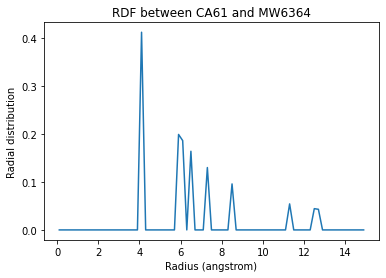

In [7]:
plt.plot(ss_rdf.bins, ca61_h2o_571)
w570 = water[570]
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('RDF between CA61 and {}{}'.format(w570.name, w570.resid));

In [8]:
j, k, nbin = np.nonzero(ss_rdf.rdf[0])
print(len(j), len(k), len(nbin))

4374 4374 4374


In [9]:
ss_rdf.rdf[0][j[0], k[0], nbin[0]]

0.0489374090650898

Right now, we don’t care which particular bin has a nonzero value. Let’s find which water atom is the most present around the alpha-carbon of residue 60, i.e. the first atom.



In [10]:
# where j == 0, representing the first atom
water_for_ca60 = k[j==0]
# count how many of each atom index are in array
k_values, k_counts = np.unique(water_for_ca60,
                               return_counts=True)
# get the first k value with the most counts
k_max = k_values[np.argmax(k_counts)]
print('The water atom with the highest distribution '
      'around CA60 has index {}'.format(k_max))


The water atom with the highest distribution around CA60 has index 568


You can also calculate a cumulative distribution function for each of your results with ss_rdf.get_cdf(). This is the actual count of atoms within the given range, averaged over the trajectory; the volume of each radial shell is not taken into account. The result then gets saved into ss_rdf.cdf. The CDF has the same shape as the corresponding RDF array.

In [11]:
cdf = ss_rdf.get_cdf()
print(cdf[0].shape)

(2, 1041, 75)


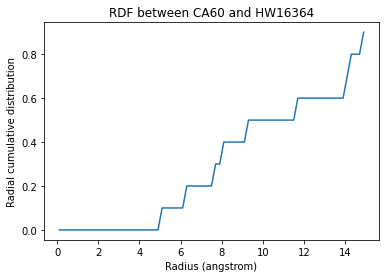

In [12]:
plt.plot(ss_rdf.bins, ss_rdf.cdf[0][0][568])
w568 = water[568]
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial cumulative distribution')
plt.title('RDF between CA60 and {}{}'.format(w568.name, w568.resid));

## The site-specific RDF without densities

When the density of the selected atom groups over the box volume is not accounted for, your distribution values will be proportionally lower.

In [13]:
ss_rdf_nodensity = rdf.InterRDF_s(u, ags,
                    nbins=75,  # default
                    range=(0.0, 15.0),  # distance
                    density=False,
                   )
ss_rdf_nodensity.run();
ss_rdf_nodensity.get_cdf();


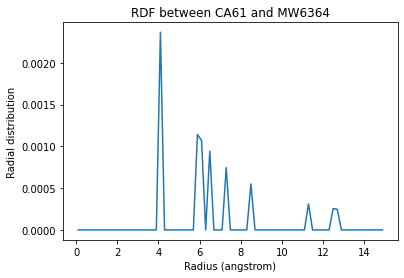

In [14]:
plt.plot(ss_rdf_nodensity.bins,
         ss_rdf_nodensity.rdf[0][1][570])
plt.xlabel('Radius (angstrom)')
plt.ylabel('Radial distribution')
plt.title('RDF between CA61 and {}{}'.format(w570.name, w570.resid));